# Preprocessing the Inspection Dataset

In [69]:
import pandas as pd
import numpy as np

In [70]:
inspections = pd.read_csv('Data/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
inspections.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,A,05/11/2018,04/28/2019,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,A,05/11/2018,04/28/2019,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,04/28/2019,Cycle Inspection / Initial Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,04/28/2019,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,04/28/2019,Cycle Inspection / Initial Inspection


In [72]:
inspections.shape

(381911, 18)

In [73]:
inspections[inspections['VIOLATION CODE']=='06D']['GRADE'].value_counts()

A                 13148
B                  1249
C                   310
Z                   134
Not Yet Graded      130
P                    71
Name: GRADE, dtype: int64

**Above results suggest that the relationship between 'VIOLATION CODE' and 'GRADE' is not pairwise. So we decided to keep both columns as metrics.**

In [74]:
inspections['GRADE'].value_counts()

A                 152827
B                  24214
C                   7927
Z                   2559
Not Yet Graded      2535
P                   2284
G                      5
Name: GRADE, dtype: int64

In [75]:
inspections[inspections['GRADE']=='P'].sample(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
323767,50059954,CAFFE BENE,MANHATTAN,378,CANAL ST,10013.0,9179637779,CafÃ©/Coffee/Tea,08/02/2018,Establishment re-opened by DOHMH,10F,Non-food contact surface improperly constructe...,Not Critical,4.0,P,08/02/2018,04/28/2019,Cycle Inspection / Reopening Inspection
362303,50075593,SUMELA TO GO,BROOKLYN,145,COURT ST,11201.0,7188555050,Turkish,06/22/2018,Establishment re-opened by DOHMH,10B,Plumbing not properly installed or maintained;...,Not Critical,6.0,P,06/22/2018,04/28/2019,Pre-permit (Operational) / Reopening Inspection
71612,41181385,EL DESPERTAR MARLENE,BRONX,849,PROSPECT AVENUE,10459.0,7188930324,"Latin (Cuban, Dominican, Puerto Rican, South &...",03/21/2018,Establishment re-opened by DOHMH,09C,Food contact surface not properly maintained.,Not Critical,2.0,P,03/21/2018,04/28/2019,Cycle Inspection / Reopening Inspection
164502,41664038,SIMPLY BAKERY,MANHATTAN,70,BAYARD STREET,10013.0,2127751188,Bakery,11/17/2016,Establishment re-opened by DOHMH,10F,Non-food contact surface improperly constructe...,Not Critical,4.0,P,11/17/2016,04/28/2019,Cycle Inspection / Reopening Inspection
300205,50051729,NEW YORK YUMMY TACO,BROOKLYN,129,CHURCH AVE,11218.0,7186967038,Mexican,02/16/2017,Establishment re-opened by DOHMH,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,P,02/16/2017,04/28/2019,Cycle Inspection / Reopening Inspection


In [76]:
inspections[inspections['GRADE']=='Z'].sample(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
333021,50064268,SHU JIAO FUZHOUESE CUISINE,MANHATTAN,118,ELDRIDGE ST,10002.0,9177706686,Chinese,03/29/2019,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,Not Critical,25.0,Z,03/29/2019,04/28/2019,Cycle Inspection / Re-inspection
357508,50073537,MAMAN,MANHATTAN,22,W 25TH ST,10010.0,6468380700,French,04/12/2019,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,23.0,Z,04/12/2019,04/28/2019,Cycle Inspection / Re-inspection
196358,50002071,DELIS 48,MANHATTAN,48,W 48 STREET,10036.0,2127689600,American,03/21/2019,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,27.0,Z,03/21/2019,04/28/2019,Cycle Inspection / Re-inspection
170123,41685527,CAMPAGNA QUATTRO GATTI,MANHATTAN,205,EAST 81 STREET,10028.0,2125701073,Italian,04/10/2019,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,26.0,Z,04/10/2019,04/28/2019,Cycle Inspection / Re-inspection
357287,50073413,MISS LI HENAN CUISINE,QUEENS,13349,ROOSEVELT AVE,11354.0,3473684442,Chinese,03/13/2019,Violations were cited in the following area(s).,09C,Food contact surface not properly maintained.,Not Critical,24.0,Z,03/13/2019,04/28/2019,Cycle Inspection / Re-inspection


In [77]:
inspections['SCORE'].max()

156.0

In [78]:
inspections['SCORE'].min()

-1.0

According to the column info provided by NYC Open Data:
- N = Not Yet Graded
- A = Grade A
- B = Grade B
- C = Grade C
- Z = Grade Pending
- P = Grade Pending issued on re-opening following an initial inspection that resulted in a closure

In [79]:
inspections['GRADE'].replace({'Not Yet Graded':np.nan, 'Z':np.nan, 'P':np.nan, 'G':np.nan}, inplace=True)
inspections['GRADE'].value_counts()

A    152827
B     24214
C      7927
Name: GRADE, dtype: int64

In [80]:
inspections['CRITICAL FLAG'].value_counts()

Critical          208533
Not Critical      164991
Not Applicable      8387
Name: CRITICAL FLAG, dtype: int64

In [81]:
inspections['CRITICAL FLAG'].replace({'Not Applicable':np.nan}, inplace=True)
inspections['CRITICAL FLAG'].value_counts()

Critical        208533
Not Critical    164991
Name: CRITICAL FLAG, dtype: int64

In [82]:
inspections['BORO'].value_counts()

MANHATTAN        151520
BROOKLYN          96622
QUEENS            86225
BRONX             34017
STATEN ISLAND     13378
Missing             149
Name: BORO, dtype: int64

In [83]:
inspections['BORO'].replace({'STATEN ISLAND ':np.nan}, inplace=True)

In [84]:
inspections.isna().sum()

CAMIS                         0
DBA                         509
BORO                          0
BUILDING                    228
STREET                        1
ZIPCODE                    5551
PHONE                         9
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1302
VIOLATION CODE             5785
VIOLATION DESCRIPTION      8387
CRITICAL FLAG              8387
SCORE                     18184
GRADE                    196943
GRADE DATE               192091
RECORD DATE                   0
INSPECTION TYPE            1302
dtype: int64

In [85]:
cols = ['CAMIS', 'DBA', 'BORO', 'CUISINE DESCRIPTION', 'VIOLATION CODE', 'CRITICAL FLAG', 'SCORE', 'GRADE', 'GRADE DATE']
insp = inspections[cols]
insp.head(5)

,CAMIS,DBA,BORO,CUISINE DESCRIPTION,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE,GRADE DATE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,08C,Not Critical,5.0,A,05/11/2018
1,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,10F,Not Critical,5.0,A,05/11/2018
2,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,06D,Critical,7.0,A,05/18/2017
3,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,10F,Not Critical,7.0,A,05/18/2017
4,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,04L,Critical,10.0,A,02/18/2016


### Checking for missing values

In [86]:
insp.isna().sum()

CAMIS                       0
DBA                       509
BORO                        0
CUISINE DESCRIPTION         0
VIOLATION CODE           5785
CRITICAL FLAG            8387
SCORE                   18184
GRADE                  196943
GRADE DATE             192091
dtype: int64

In [87]:
insp = insp.dropna()

In [88]:
insp.isna().sum()

CAMIS                  0
DBA                    0
BORO                   0
CUISINE DESCRIPTION    0
VIOLATION CODE         0
CRITICAL FLAG          0
SCORE                  0
GRADE                  0
GRADE DATE             0
dtype: int64

In [89]:
insp['CRITICAL FLAG'].replace(['Not Critical','Critical'],[0,1],inplace=True)

In [90]:
insp['CRITICAL FLAG'].astype(int)
insp['CRITICAL FLAG'].value_counts()

1    94191
0    89535
Name: CRITICAL FLAG, dtype: int64

In [91]:
# inspections['GRADE DATE'] = inspections['GRADE DATE'].dt.strftime('%m/%d/%Y')
# pd.to_datetime(inspections['GRADE DATE'], format='%m/%d/%Y' ).dt.date.value_counts().rename('VIO_COUNT').to_frame()
# inspections['Vio_Counts']=inspections.groupby(pd.to_datetime(inspections['GRADE DATE'], format='%m/%d/%Y').dt.date.value_counts())
insp['VIO_COUNT'] = insp.groupby(['CAMIS', 'GRADE DATE'])['VIOLATION CODE'].transform('size')
insp.head(2)

,CAMIS,DBA,BORO,CUISINE DESCRIPTION,VIOLATION CODE,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,VIO_COUNT
0,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,08C,0,5.0,A,05/11/2018,2
1,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,10F,0,5.0,A,05/11/2018,2


In [92]:
insp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183726 entries, 0 to 381484
Data columns (total 10 columns):
CAMIS                  183726 non-null int64
DBA                    183726 non-null object
BORO                   183726 non-null object
CUISINE DESCRIPTION    183726 non-null object
VIOLATION CODE         183726 non-null object
CRITICAL FLAG          183726 non-null int64
SCORE                  183726 non-null float64
GRADE                  183726 non-null object
GRADE DATE             183726 non-null object
VIO_COUNT              183726 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 15.4+ MB


In [93]:
grade_merged = insp.groupby(['CAMIS','GRADE DATE'])['GRADE'].apply(set).reset_index()
grade_merged.rename(columns={'GRADE':'GRADE_LIST'},inplace=True)
grade_merged['GRADE_LIST'].value_counts()

{A}    70907
{B}     6512
{C}     1856
Name: GRADE_LIST, dtype: int64

**This is to say, the grade is assigned once at a time.**

In [94]:
vio_merged = insp.groupby(['CAMIS','GRADE DATE'])['VIOLATION CODE'].apply(set).reset_index()
vio_merged.rename(columns={'VIOLATION CODE':'VIO_CODE_LIST'},inplace=True)
vio_merged.head(2)

,CAMIS,GRADE DATE,VIO_CODE_LIST
0,30075445,02/18/2016,"{08A, 04L}"
1,30075445,05/11/2018,"{10F, 08C}"


In [95]:
vio_critical = insp.groupby(['CAMIS','GRADE DATE'])['CRITICAL FLAG'].sum().reset_index()
vio_critical.rename(columns={'CRITICAL FLAG':'CRITICAL_COUNT'},inplace=True)
vio_critical.head(2)

,CAMIS,GRADE DATE,CRITICAL_COUNT
0,30075445,02/18/2016,1
1,30075445,05/11/2018,0


In [96]:
vio = pd.merge(vio_merged, vio_critical, on=['CAMIS', 'GRADE DATE'])
vio.head(5)

,CAMIS,GRADE DATE,VIO_CODE_LIST,CRITICAL_COUNT
0,30075445,02/18/2016,"{08A, 04L}",1
1,30075445,05/11/2018,"{10F, 08C}",0
2,30075445,05/18/2017,"{10F, 06D}",1
3,30112340,03/04/2019,"{10F, 02G, 10B}",1
4,30112340,03/13/2018,"{08A, 04L, 10B}",1


In [97]:
insp_ = pd.merge(insp.loc[:, ['CAMIS', 'DBA', 'BORO', 'CUISINE DESCRIPTION', 'GRADE DATE', 'SCORE', 'GRADE', 'VIO_COUNT']], vio, on=['CAMIS', 'GRADE DATE'])
insp_.head(5)

,CAMIS,DBA,BORO,CUISINE DESCRIPTION,GRADE DATE,SCORE,GRADE,VIO_COUNT,VIO_CODE_LIST,CRITICAL_COUNT
0,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,05/11/2018,5.0,A,2,"{10F, 08C}",0
1,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,05/11/2018,5.0,A,2,"{10F, 08C}",0
2,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,05/18/2017,7.0,A,2,"{10F, 06D}",1
3,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,05/18/2017,7.0,A,2,"{10F, 06D}",1
4,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,02/18/2016,10.0,A,2,"{08A, 04L}",1


In [98]:
insp_['GRADE DATE'] = pd.to_datetime(insp_['GRADE DATE'])

### Keep only most recent date records

In [99]:
unique_insp = insp_.sort_values('GRADE DATE').drop_duplicates(['CAMIS','DBA'], keep='last').sort_index()
unique_insp.reset_index(inplace=True, drop=True)
unique_insp.head(5)

,CAMIS,DBA,BORO,CUISINE DESCRIPTION,GRADE DATE,SCORE,GRADE,VIO_COUNT,VIO_CODE_LIST,CRITICAL_COUNT
0,30075445,MORRIS PARK BAKE SHOP,BRONX,Bakery,2018-05-11,5.0,A,2,"{10F, 08C}",0
1,30112340,WENDY'S,BROOKLYN,Hamburgers,2019-03-04,13.0,A,3,"{10F, 02G, 10B}",1
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,Irish,2018-05-16,12.0,A,3,"{08A, 10F, 04L}",1
3,40356018,RIVIERA CATERERS,BROOKLYN,American,2018-10-30,10.0,A,2,"{10F, 06D}",1
4,40356151,BRUNOS ON THE BOULEVARD,QUEENS,American,2017-08-19,10.0,A,2,"{10F, 06C}",1


In [100]:
unique_insp.isna().sum()

CAMIS                  0
DBA                    0
BORO                   0
CUISINE DESCRIPTION    0
GRADE DATE             0
SCORE                  0
GRADE                  0
VIO_COUNT              0
VIO_CODE_LIST          0
CRITICAL_COUNT         0
dtype: int64

In [101]:
unique_insp.to_csv('most_recent_inspections.csv', index=False)

In [102]:
# visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# # heat map of correlation of features
# correlation_matrix = unique_insp.corr()
# fig = plt.figure(figsize=(12,9))
# sns.heatmap(correlation_matrix,vmax=0.8,square = True)
# plt.show()

In [104]:
rest_count = unique_insp.shape[0]
A_list = unique_insp[unique_insp['GRADE'] == 'A']

x = len(A_list)/rest_count
print("Score A: % 3d" %(int(x*100)),  '%') 
# print('Score A Percentage:',,)

Score A:  92 %


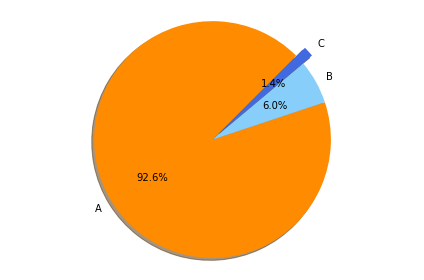

In [105]:
cmap = plt.get_cmap('Spectral')
# colors = [cmap(i) for i in np.linspace(0, 1, 9)]
colors = ['darkorange', 'lightskyblue', 'royalblue']
# Pie chart
labels = ['A', 'B', 'C']
sizes = [unique_insp['GRADE'].value_counts()[0], unique_insp['GRADE'].value_counts()[1], unique_insp['GRADE'].value_counts()[2]]
explode = (0, 0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors=colors, startangle=45)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()